In [322]:
# Importing Relevant Packages

# Standard imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistical packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [323]:
med_data = pd.read_csv ('medical_clean.csv')
med_data.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat',
 'Item3':'Timely_visits','Item4':'Reliability',
 'Item5':'Options','Item6':'Hrs_treat',
 'Item7':'Courteous','Item8':'Active_listen'},inplace=True)
med_data.head()
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [324]:
#check if there are any missing data entries - if there are none then the output should be False
med_data.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [325]:
# Detecting Duplicates
# No Duplicates Detected
print(med_data.duplicated().value_counts())

False    10000
Name: count, dtype: int64


I used .describe() for the summary statistics of the data set. Boxplots and z-scores for outlier detections. Histograms to determine the distributions of the variables used in the regression analysis. value_counts() for tracking the categorical/dummy variables and how much of each value they contain. This is done for the dependent and independent variables of the regression analysis. value_counts() function returns Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default. 

Kept all the outliers as they seemed reasonable for the analysis. 

In [326]:
# finding the count of unique values in each column, then use value_counts to find unique values for specific columns
med_data.nunique()

CaseOrder             10000
Customer_id           10000
Interaction           10000
UID                   10000
City                   6072
State                    52
County                 1607
Zip                    8612
Lat                    8588
Lng                    8725
Population             5951
Area                      3
TimeZone                 26
Job                     639
Children                 11
Age                      72
Income                 9993
Marital                   5
Gender                    3
ReAdmis                   2
VitD_levels            9976
Doc_visits                9
Full_meals_eaten          8
vitD_supp                 6
Soft_drink                2
Initial_admin             3
HighBlood                 2
Stroke                    2
Complication_risk         3
Overweight                2
Arthritis                 2
Diabetes                  2
Hyperlipidemia            2
BackPain                  2
Anxiety                   2
Allergic_rhinitis   

In [327]:
med_data['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [328]:
med_data['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [329]:
med_data['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [330]:
med_data['Reflux_esophagitis'].value_counts()

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [331]:
med_data['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [332]:
med_data['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [333]:
med_data['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [334]:
med_data['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [335]:
med_data['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [336]:
med_data['Full_meals_eaten'].value_counts()

Full_meals_eaten
0    3715
1    3615
2    1856
3     612
4     169
5      25
6       6
7       2
Name: count, dtype: int64

In [337]:
med_data['VitD_levels'].value_counts()

VitD_levels
18.135431    2
15.939760    2
17.821860    2
20.184170    2
18.741340    2
            ..
18.825293    1
16.849021    1
15.111106    1
20.583694    1
18.388620    1
Name: count, Length: 9976, dtype: int64

In [338]:
med_data['vitD_supp'].value_counts()

vitD_supp
0    6702
1    2684
2     544
3      64
4       5
5       1
Name: count, dtype: int64

In [339]:
med_data['Doc_visits'].value_counts()

Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: count, dtype: int64

In [340]:
med_data['Age'].value_counts()

Age
47    161
52    159
74    159
41    157
86    156
     ... 
63    123
51    122
20    120
36    118
80    116
Name: count, Length: 72, dtype: int64

In [341]:
# Detecting outliers for Age variable
# No outliers present
med_data['z_score_age']=stats.zscore(med_data['Age'])
med_data[['Age','z_score_age']].head

<bound method NDFrame.head of       Age  z_score_age
0      53    -0.024795
1      51    -0.121706
2      53    -0.024795
3      78     1.186592
4      22    -1.526914
...   ...          ...
9995   25    -1.381548
9996   87     1.622691
9997   45    -0.412438
9998   43    -0.509349
9999   70     0.798948

[10000 rows x 2 columns]>

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([-1.72073600e+00, -1.37670219e+00, -1.03266837e+00, -6.88634559e-01,
        -3.44600744e-01, -5.66928963e-04,  3.43466886e-01,  6.87500701e-01,
         1.03153452e+00,  1.37556833e+00,  1.71960215e+00]),
 <BarContainer object of 10 artists>)

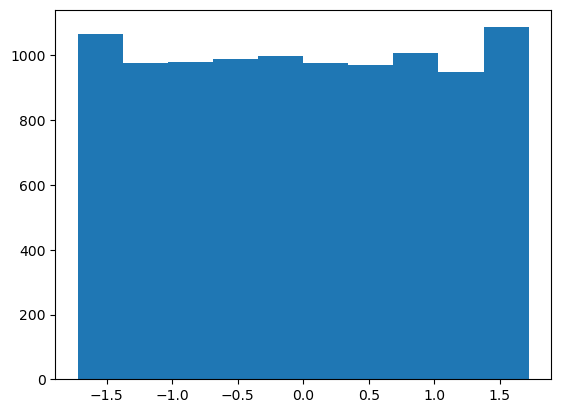

In [342]:
plt.hist(med_data['z_score_age'])

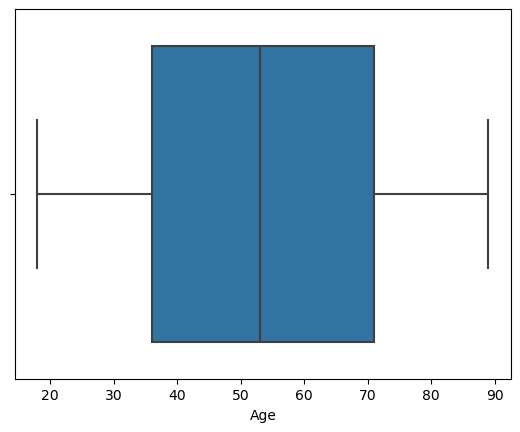

In [343]:
boxplot=sns.boxplot(x='Age',data=med_data)

In [344]:
# Detecting outliers via z-scores for Doc_visits variable
# No outliers present
med_data['z_score_doc_visits']=stats.zscore(med_data['Doc_visits'])
med_data[['Doc_visits','z_score_doc_visits']].head

<bound method NDFrame.head of       Doc_visits  z_score_doc_visits
0              6            0.944647
1              4           -0.967981
2              4           -0.967981
3              4           -0.967981
4              5           -0.011667
...          ...                 ...
9995           4           -0.967981
9996           5           -0.011667
9997           4           -0.967981
9998           5           -0.011667
9999           5           -0.011667

[10000 rows x 2 columns]>

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([-3.83692119, -3.07187036, -2.30681952, -1.54176869, -0.77671786,
        -0.01166703,  0.75338381,  1.51843464,  2.28348547,  3.04853631,
         3.81358714]),
 <BarContainer object of 10 artists>)

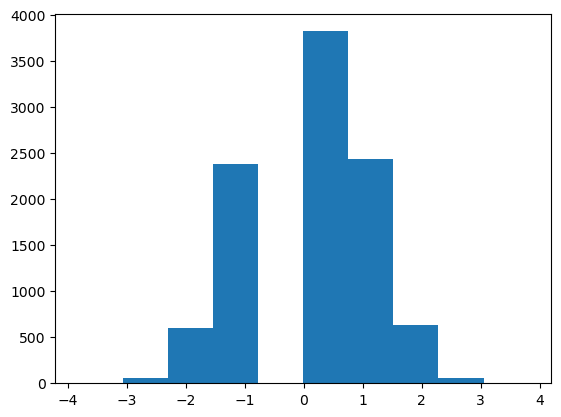

In [345]:
plt.hist(med_data['z_score_doc_visits'])

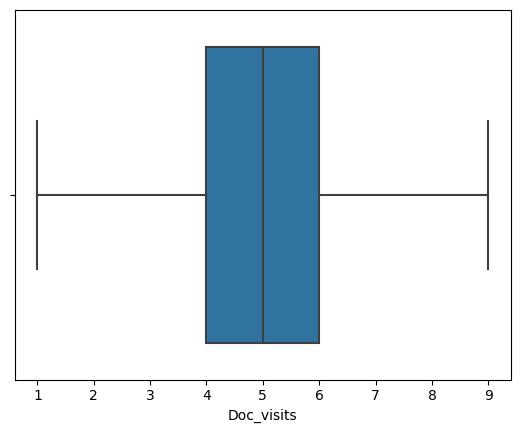

In [346]:
boxplot=sns.boxplot(x='Doc_visits',data=med_data)

In [347]:
# Detecting outliers for VitD_levels variable
# Outliers are present and will be retained
med_data['z_score_vitd']=stats.zscore(med_data['VitD_levels'])
med_data[['VitD_levels','z_score_vitd']].head

<bound method NDFrame.head of       VitD_levels  z_score_vitd
0       19.141466      0.583603
1       18.940352      0.483901
2       18.057507      0.046227
3       16.576858     -0.687811
4       17.439069     -0.260366
...           ...           ...
9995    16.980860     -0.487525
9996    18.177020      0.105476
9997    17.129070     -0.414049
9998    19.910430      0.964820
9999    18.388620      0.210377

[10000 rows x 2 columns]>

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([-4.04424997, -3.22189522, -2.39954048, -1.57718573, -0.75483099,
         0.06752375,  0.8898785 ,  1.71223324,  2.53458799,  3.35694273,
         4.17929747]),
 <BarContainer object of 10 artists>)

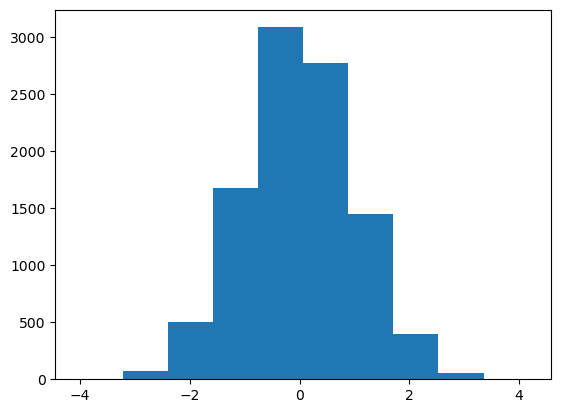

In [348]:
plt.hist(med_data['z_score_vitd'])

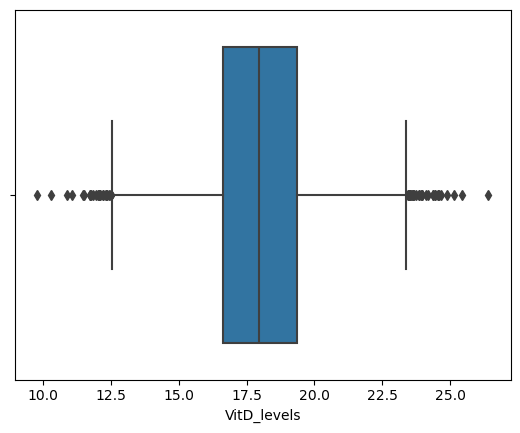

In [349]:
boxplot=sns.boxplot(x='VitD_levels',data=med_data)

In [350]:
# Detecting outliers for VitD_supp variable
# Outliers are present and will be retained
med_data['z_score_vitd_supp']=stats.zscore(med_data['vitD_supp'])
med_data[['vitD_supp','z_score_vitd_supp']].head

<bound method NDFrame.head of       vitD_supp  z_score_vitd_supp
0             0          -0.634713
1             1           0.956445
2             0          -0.634713
3             0          -0.634713
4             2           2.547602
...         ...                ...
9995          1           0.956445
9996          0          -0.634713
9997          0          -0.634713
9998          1           0.956445
9999          1           0.956445

[10000 rows x 2 columns]>

(array([6.702e+03, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([-0.63471264,  0.160866  ,  0.95644465,  1.75202329,  2.54760193,
         3.34318058,  4.13875922,  4.93433787,  5.72991651,  6.52549516,
         7.3210738 ]),
 <BarContainer object of 10 artists>)

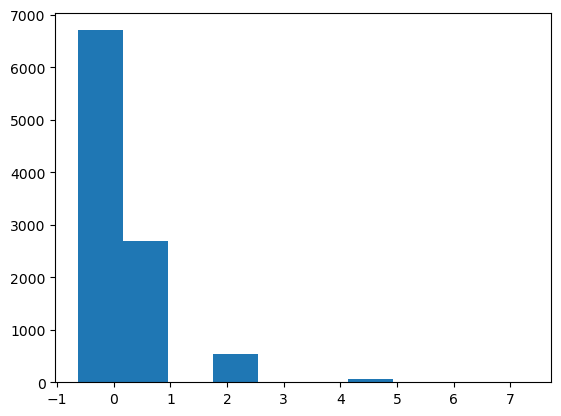

In [351]:
plt.hist(med_data['z_score_vitd_supp'])

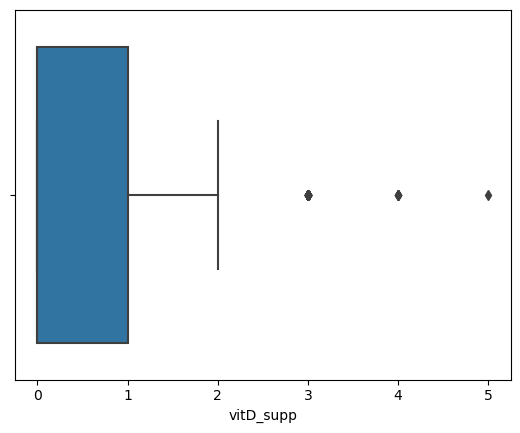

In [352]:
boxplot=sns.boxplot(x='vitD_supp',data=med_data)

In [353]:
# Detecting outliers for Full_meals_eaten variable
# Outliers are present and will be retained
med_data['z_score_meals']=stats.zscore(med_data['Full_meals_eaten'])
med_data[['Full_meals_eaten','z_score_meals']].head

<bound method NDFrame.head of       Full_meals_eaten  z_score_meals
0                    0      -0.993387
1                    2       0.990609
2                    1      -0.001389
3                    1      -0.001389
4                    0      -0.993387
...                ...            ...
9995                 2       0.990609
9996                 0      -0.993387
9997                 2       0.990609
9998                 2       0.990609
9999                 0      -0.993387

[10000 rows x 2 columns]>

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([-0.99338686, -0.29898822,  0.39541043,  1.08980907,  1.78420771,
         2.47860636,  3.173005  ,  3.86740364,  4.56180229,  5.25620093,
         5.95059957]),
 <BarContainer object of 10 artists>)

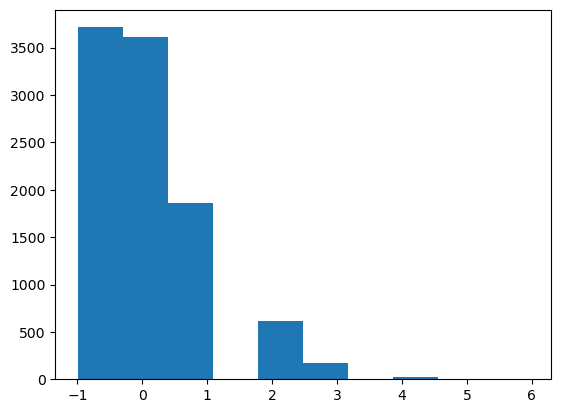

In [354]:
plt.hist(med_data['z_score_meals'])

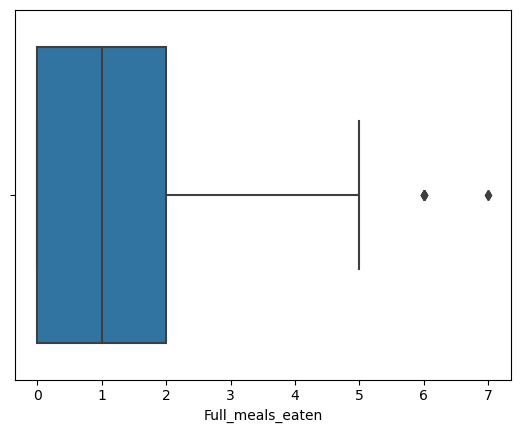

In [355]:
boxplot=sns.boxplot(x='Full_meals_eaten',data=med_data)

In [356]:
# remove demographic data from the data set since these entries won't be necessary for the multiple regression analysis
med_data = med_data.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis=1)


The data transformation that was required was limited to the re-expression of categorical variables to numerical variables. These include all of the ordinal variables: High Blood Pressure, Overweight, Anxiety, Reflux Esophagitis, Back Pain, Hyperlipidemia, Stroke, Arthritis, Diabetes, Asthma. All of the ordinal variables that were Yes or No values were re-expressed into binary/boolean 1 and 0, respectively. Also considered as dummy variables.

Variables such as Gender, Marital, Initial_admin, Complication_risk, Services were also re-expressed as numerical values due to one hot encoding used for nominal values.

In [357]:
# convert categorical/factor variables with yes/no values to numeric 1/0 values
med_data = med_data.replace(to_replace = ['Yes','No'],value = [1,0])
med_data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,z_score_age,z_score_doc_visits,z_score_vitd,z_score_vitd_supp,z_score_meals
0,1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,-0.024795,0.944647,0.583603,-0.634713,-0.993387
1,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,-0.121706,-0.967981,0.483901,0.956445,0.990609
2,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,-0.024795,-0.967981,0.046227,-0.634713,-0.001389
3,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.186592,-0.967981,-0.687811,-0.634713,-0.001389
4,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,-1.526914,-0.011667,-0.260366,2.547602,-0.993387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,-1.381548,-0.967981,-0.487525,0.956445,0.990609
9996,4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,1.622691,-0.011667,0.105476,-0.634713,-0.993387
9997,3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,-0.412438,-0.967981,-0.414049,-0.634713,0.990609
9998,3,43,29702.32,Divorced,Male,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,-0.509349,-0.011667,0.964820,0.956445,0.990609


In [358]:
# convert the categorical variable of genders to a numeric variable
med_data['Gender'] = med_data['Gender'].replace(['Male','Female','Nonbinary'],[1,2,3])
med_data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,z_score_age,z_score_doc_visits,z_score_vitd,z_score_vitd_supp,z_score_meals
0,1,53,86575.93,Divorced,1,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,-0.024795,0.944647,0.583603,-0.634713,-0.993387
1,3,51,46805.99,Married,2,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,-0.121706,-0.967981,0.483901,0.956445,0.990609
2,3,53,14370.14,Widowed,2,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,-0.024795,-0.967981,0.046227,-0.634713,-0.001389
3,0,78,39741.49,Married,1,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.186592,-0.967981,-0.687811,-0.634713,-0.001389
4,1,22,1209.56,Widowed,2,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,-1.526914,-0.011667,-0.260366,2.547602,-0.993387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,1,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,-1.381548,-0.967981,-0.487525,0.956445,0.990609
9996,4,87,14983.02,Widowed,1,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,1.622691,-0.011667,0.105476,-0.634713,-0.993387
9997,3,45,65917.81,Separated,2,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,-0.412438,-0.967981,-0.414049,-0.634713,0.990609
9998,3,43,29702.32,Divorced,1,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,-0.509349,-0.011667,0.964820,0.956445,0.990609


In [359]:
# convert the non-married Marital status values to "Married/Not Married", then convert "Married/Not Married" to "1/0"
#this will make the Marital variable easier to work with during regression analysis
med_data['Marital'] = med_data['Marital'].replace(['Divorced','Widowed','Separated','Never Married'],'Not Married')
med_data['Marital'] = med_data['Marital'].replace(['Married','Not Married'],[1,0])

In [360]:
# convert the Initial_Admin, Complication_risk, and Services variables into integers before proceeding
med_data['Initial_admin'] = med_data['Initial_admin'].replace(['Elective Admission','Observation Admission','Emergency Admission'],[1,2,3])
med_data['Complication_risk'] = med_data['Complication_risk'].replace(['Low','Medium','High'],[1,2,3])
med_data['Services'] = med_data['Services'].replace(['Blood Work','CT Scan','Intravenous','MRI'],[1,2,3,4])
med_data.info()
med_data.describe()
my_list = med_data.columns.values.tolist()
print(my_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  int64  
 4   Gender              10000 non-null  int64  
 5   ReAdmis             10000 non-null  int64  
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  int64  
 11  Initial_admin       10000 non-null  int64  
 12  HighBlood           10000 non-null  int64  
 13  Stroke              10000 non-null  int64  
 14  Complication_risk   10000 non-null  int64  
 15  Overweight          10000 non-null  int64  
 16  Arthr

In [361]:
# check that changes were completed for the three variables above: Initial_admin, Complication_risk, Services
med_data

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,z_score_age,z_score_doc_visits,z_score_vitd,z_score_vitd_supp,z_score_meals
0,1,53,86575.93,0,1,0,19.141466,6,0,0,0,3,1,0,2,0,1,1,0,1,1,1,0,1,1,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4,-0.024795,0.944647,0.583603,-0.634713,-0.993387
1,3,51,46805.99,1,2,0,18.940352,4,2,1,0,3,1,0,3,1,0,0,0,0,0,0,1,0,3,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3,-0.121706,-0.967981,0.483901,0.956445,0.990609
2,3,53,14370.14,0,2,0,18.057507,4,1,0,0,1,1,0,2,1,0,1,0,0,0,0,0,0,1,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3,-0.024795,-0.967981,0.046227,-0.634713,-0.001389
3,0,78,39741.49,1,1,0,16.576858,4,1,0,0,1,0,1,2,0,1,0,0,0,0,0,1,1,1,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5,1.186592,-0.967981,-0.687811,-0.634713,-0.001389
4,1,22,1209.56,0,2,0,17.439069,5,0,2,1,1,0,0,1,0,0,0,1,0,0,1,0,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3,-1.526914,-0.011667,-0.260366,2.547602,-0.993387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,0,1,0,16.980860,4,2,1,0,3,1,0,2,0,0,0,0,0,1,0,1,0,3,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2,-1.381548,-0.967981,-0.487525,0.956445,0.990609
9996,4,87,14983.02,0,1,1,18.177020,5,0,0,0,1,1,0,2,1,1,1,0,0,0,0,0,1,2,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4,1.622691,-0.011667,0.105476,-0.634713,-0.993387
9997,3,45,65917.81,0,2,1,17.129070,4,2,0,1,1,1,0,3,1,0,0,0,0,1,1,0,0,3,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2,-0.412438,-0.967981,-0.414049,-0.634713,0.990609
9998,3,43,29702.32,0,1,1,19.910430,5,2,1,0,3,0,0,2,1,0,0,0,1,0,0,0,0,1,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3,-0.509349,-0.011667,0.964820,0.956445,0.990609


In [362]:
# describe the dataframe to identify distribution of variables
med_data.describe()

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,z_score_age,z_score_doc_visits,z_score_vitd,z_score_vitd_supp,z_score_meals
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.097200,53.511700,40490.495160,0.202300,1.544600,0.366900,17.964262,5.012200,1.001400,0.398900,0.257500,2.255600,0.409000,0.199300,2.123300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,1.862500,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700,1.147527e-16,3.161915e-17,-8.059331e-16,3.694822e-17,-7.815970e-17
std,2.163659,20.638538,28521.153293,0.401735,0.539296,0.481983,2.017231,1.045734,1.008117,0.628505,0.437279,0.831347,0.491674,0.399494,0.730172,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,0.986251,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,0.000000,18.000000,154.080000,0.000000,1.000000,0.000000,9.806483,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.720736e+00,-3.836921e+00,-4.044250e+00,-6.347126e-01,-9.933869e-01
25%,0.000000,36.000000,19598.775000,0.000000,1.000000,0.000000,16.626439,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-8.485376e-01,-9.679806e-01,-6.632309e-01,-6.347126e-01,-9.933869e-01
50%,1.000000,53.000000,33768.420000,0.000000,2.000000,0.000000,17.951122,5.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,-2.479466e-02,-1.166703e-02,-6.513908e-03,-6.347126e-01,-1.388797e-03
75%,3.000000,71.000000,54296.402500,0.000000,2.000000,1.000000,19.347963,6.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,8.474037e-01,9.446465e-01,6.859750e-01,9.564446e-01,9.906093e-01
max,10.000000,89.000000,207249.100000,1.000000,3.000000,1.000000,26.394449,9.000000,7.000000,5.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.719602e+00,3.813587e+00,4.179297e+00,7.321074e+00,5.950600e+00


Any categorical variables that have > 3-5 unique values would be removed to reduce high cardinality. The categoricals with high cardinality are Services, Timely_admis, Timely_treat, Timely_visits, Reliability, Options, Hrs_treat, Courteous, Active_listen. Listed below are the summary statistics for the independent and dependent variables of the MLR.

In [363]:
med_data['HighBlood'].describe()

count    10000.000000
mean         0.409000
std          0.491674
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HighBlood, dtype: float64

In [364]:
med_data['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [365]:
med_data['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [366]:
med_data['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [367]:
med_data['vitD_supp'].describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

In [368]:
med_data['Full_meals_eaten'].describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [369]:
med_data['Overweight'].describe()

count    10000.000000
mean         0.709400
std          0.454062
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Overweight, dtype: float64

In [370]:
med_data['Anxiety'].describe()

count    10000.000000
mean         0.321500
std          0.467076
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Anxiety, dtype: float64

In [371]:
med_data['Reflux_esophagitis'].describe()

count    10000.000000
mean         0.413500
std          0.492486
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Reflux_esophagitis, dtype: float64

In [372]:
med_data['BackPain'].describe()

count    10000.000000
mean         0.411400
std          0.492112
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: BackPain, dtype: float64

In [373]:
med_data['Hyperlipidemia'].describe()

count    10000.000000
mean         0.337200
std          0.472777
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Hyperlipidemia, dtype: float64

In [374]:
med_data['Stroke'].describe()

count    10000.000000
mean         0.199300
std          0.399494
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Stroke, dtype: float64

In [375]:
med_data['Arthritis'].describe()

count    10000.000000
mean         0.357400
std          0.479258
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Arthritis, dtype: float64

In [376]:
med_data['Diabetes'].describe()

count    10000.00000
mean         0.27380
std          0.44593
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: Diabetes, dtype: float64

(array([5910.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

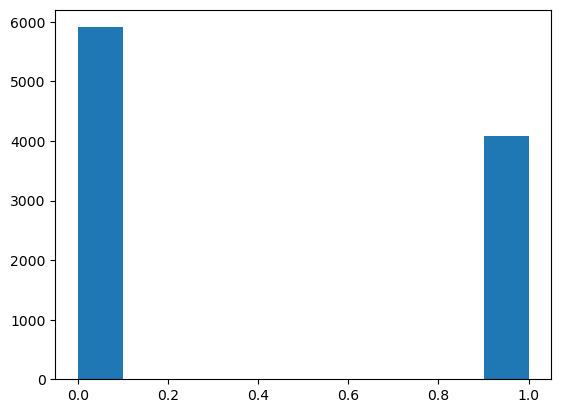

In [377]:
plt.hist(med_data['HighBlood'])

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

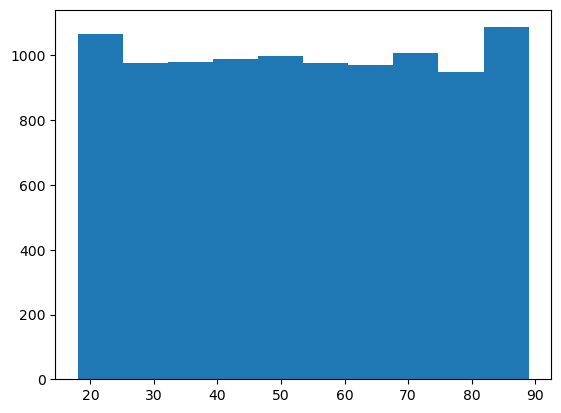

In [378]:
plt.hist(med_data['Age'])

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

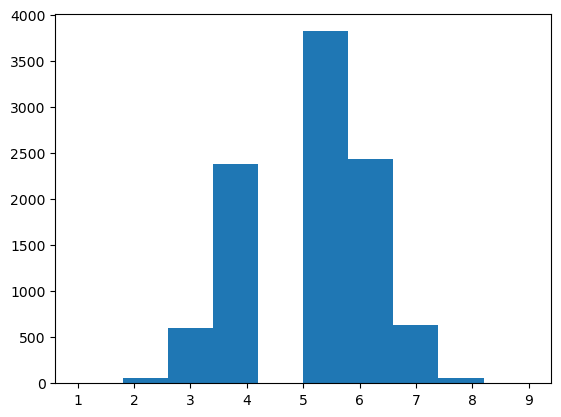

In [379]:
plt.hist(med_data['Doc_visits'])

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([ 9.806483  , 11.46527957, 13.12407614, 14.78287271, 16.44166928,
        18.10046585, 19.75926243, 21.418059  , 23.07685557, 24.73565214,
        26.39444871]),
 <BarContainer object of 10 artists>)

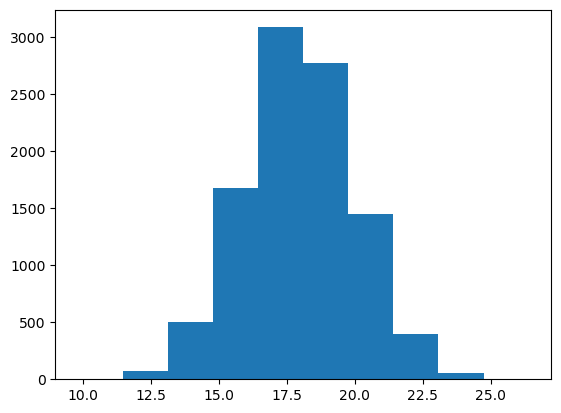

In [380]:
plt.hist(med_data['VitD_levels'])

(array([6.702e+03, 0.000e+00, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

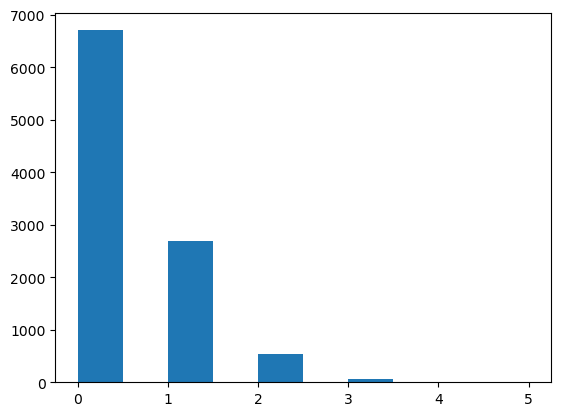

In [381]:
plt.hist(med_data['vitD_supp'])

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

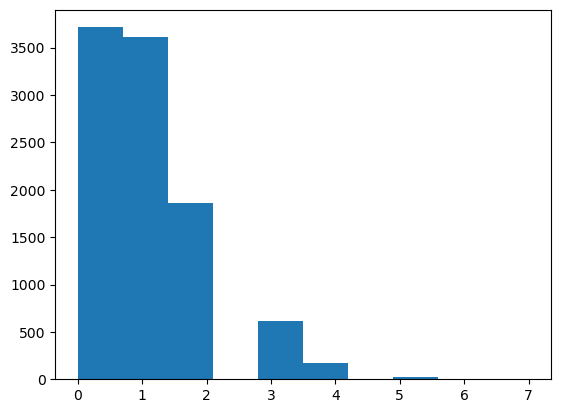

In [382]:
plt.hist(med_data['Full_meals_eaten'])

(array([2906.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

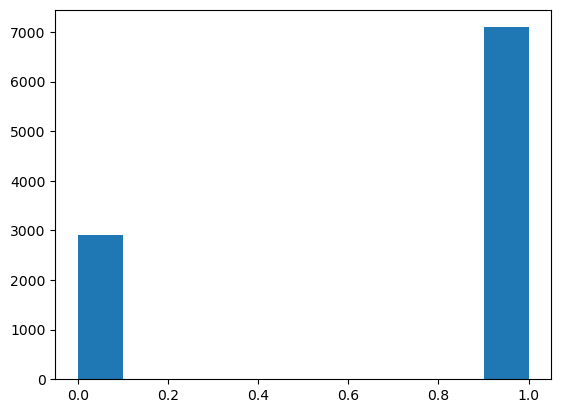

In [383]:
plt.hist(med_data['Overweight'])

(array([6785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3215.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

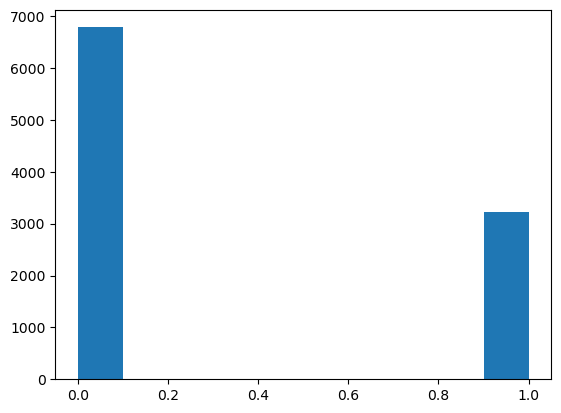

In [384]:
plt.hist(med_data['Anxiety'])

(array([5865.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

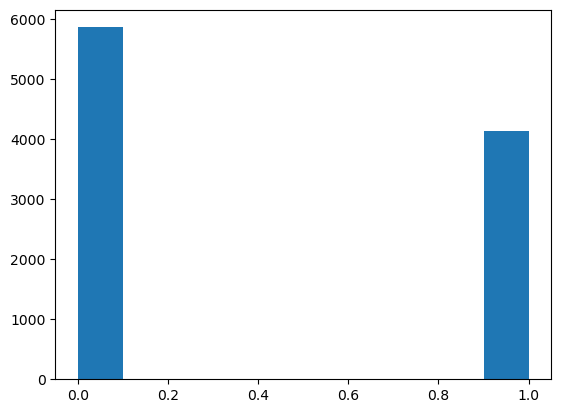

In [385]:
plt.hist(med_data['Reflux_esophagitis'])

(array([5886.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

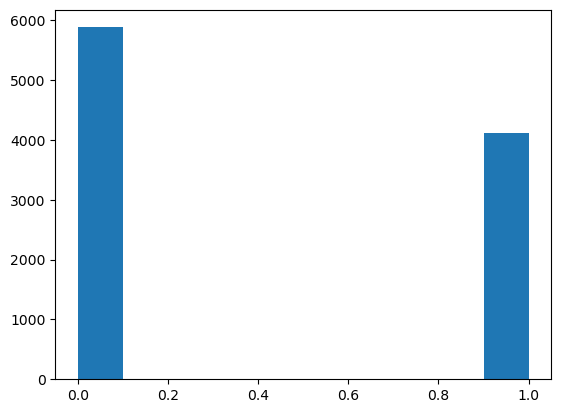

In [386]:
plt.hist(med_data['BackPain'])

(array([6628.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

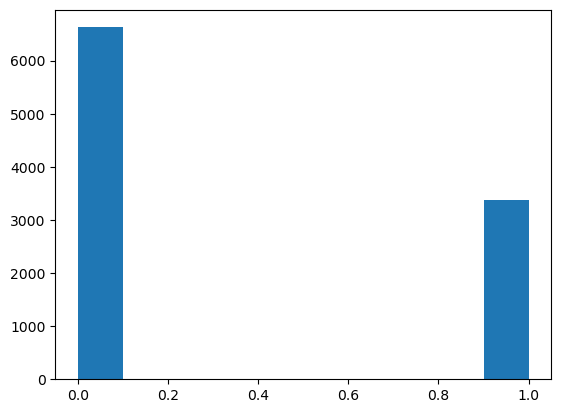

In [387]:
plt.hist(med_data['Hyperlipidemia'])

(array([8007.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

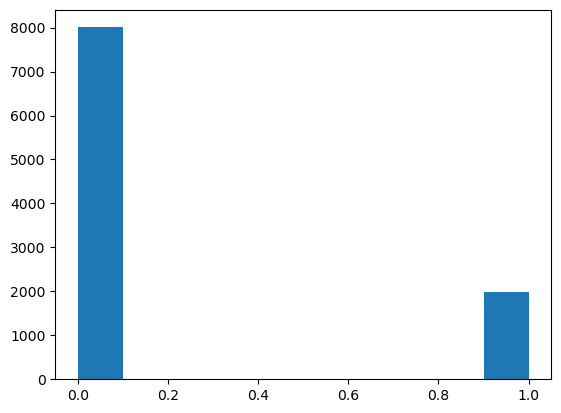

In [388]:
plt.hist(med_data['Stroke'])

(array([6426.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3574.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

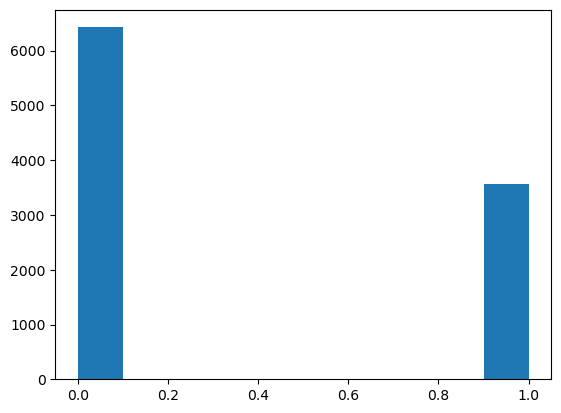

In [389]:
plt.hist(med_data['Arthritis'])

(array([7262.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2738.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

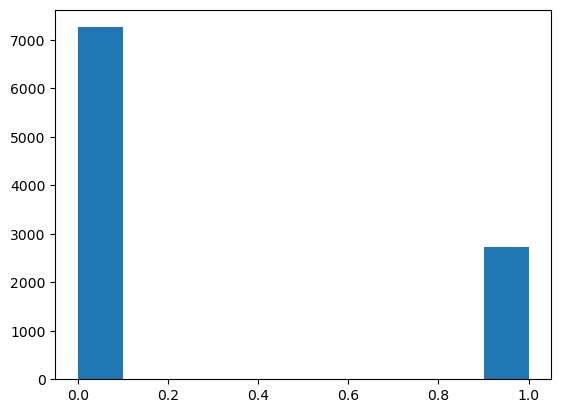

In [390]:
plt.hist(med_data['Diabetes'])

Bivariate visualizations between the continuous variable and all the independent variables associated in the regression analysis. Scatterplots and heatmaps/contingency tables were used to visualize the relationships. The reason the bivariate relationships look different compared to Task 1 is because we are comparing a binary/categorical variable with either a continuous or another categorical variable.

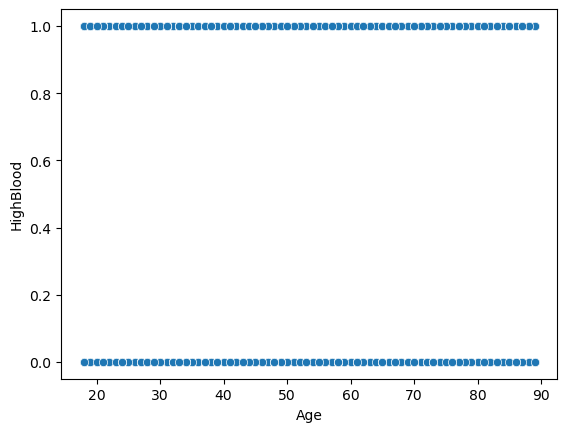

In [391]:
# HighBlood and Age
sns.scatterplot(x=med_data['Age'], y=med_data['HighBlood'])
plt.show();

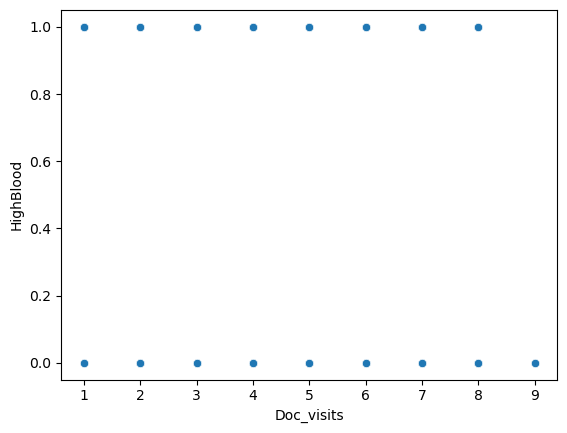

In [392]:
# HighBlood and Doctor Visits
sns.scatterplot(x=med_data['Doc_visits'], y=med_data['HighBlood'])
plt.show();

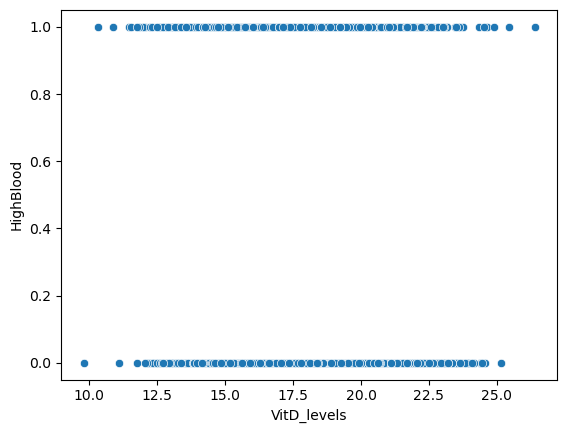

In [393]:
# HighBlood and Vitamin D Levels
sns.scatterplot(x=med_data['VitD_levels'], y=med_data['HighBlood'])
plt.show();

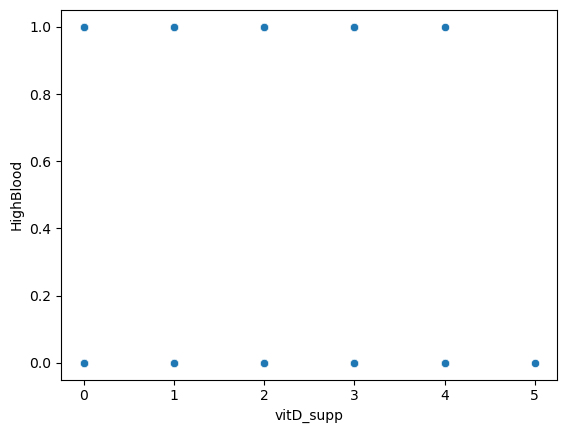

In [394]:
# HighBlood and Vitamin D Supplements
sns.scatterplot(x=med_data['vitD_supp'], y=med_data['HighBlood'])
plt.show();

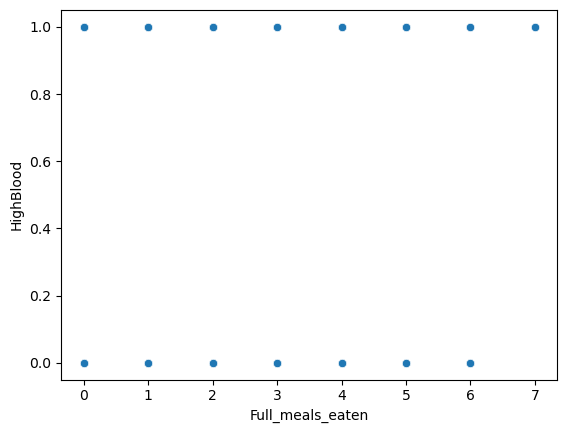

In [395]:
# HighBlood and Full Meals Eaten
sns.scatterplot(x=med_data['Full_meals_eaten'], y=med_data['HighBlood'])
plt.show();

In [396]:
# HighBlood and Anxiety
contingency= pd.crosstab(med_data['Anxiety'], med_data['HighBlood'])
contingency

HighBlood,0,1
Anxiety,,
0,4029,2756
1,1881,1334


<Axes: xlabel='HighBlood', ylabel='Anxiety'>

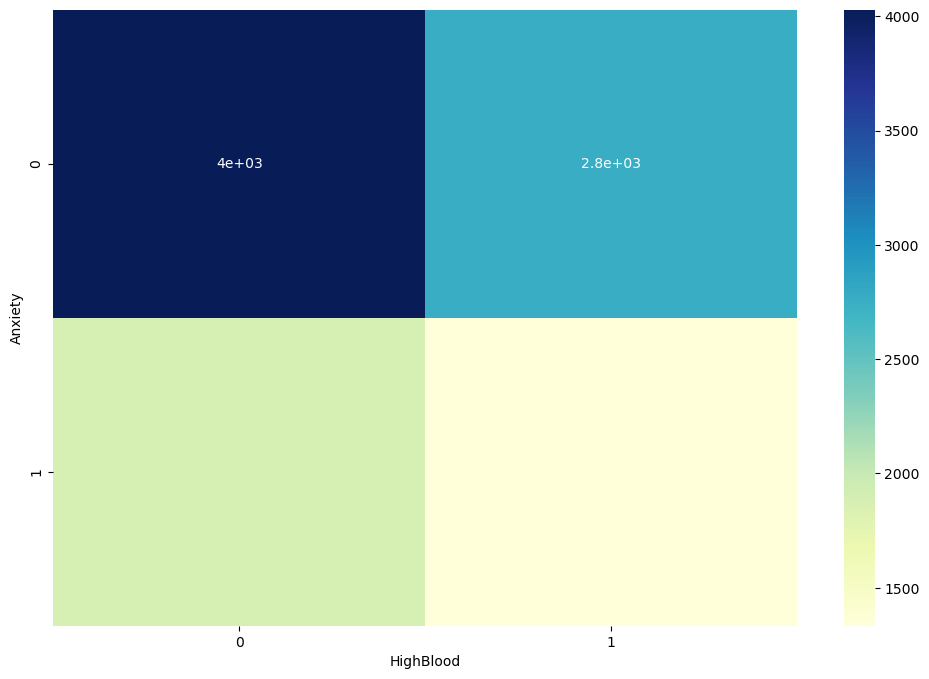

In [397]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [398]:
# HighBlood and Overweight
contingency= pd.crosstab(med_data['Overweight'], med_data['HighBlood'])
contingency

HighBlood,0,1
Overweight,,
0,1776,1130
1,4134,2960


<Axes: xlabel='HighBlood', ylabel='Overweight'>

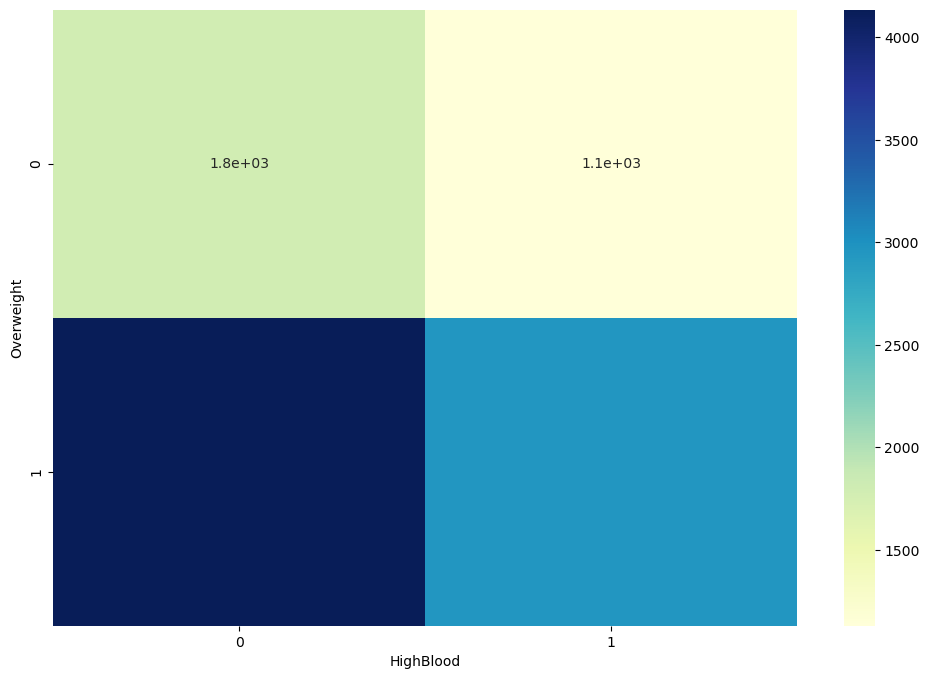

In [399]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [400]:
# HighBlood and Reflux Esophagitis
contingency= pd.crosstab(med_data['Reflux_esophagitis'], med_data['HighBlood'])
contingency

HighBlood,0,1
Reflux_esophagitis,,
0,3469,2396
1,2441,1694


<Axes: xlabel='HighBlood', ylabel='Reflux_esophagitis'>

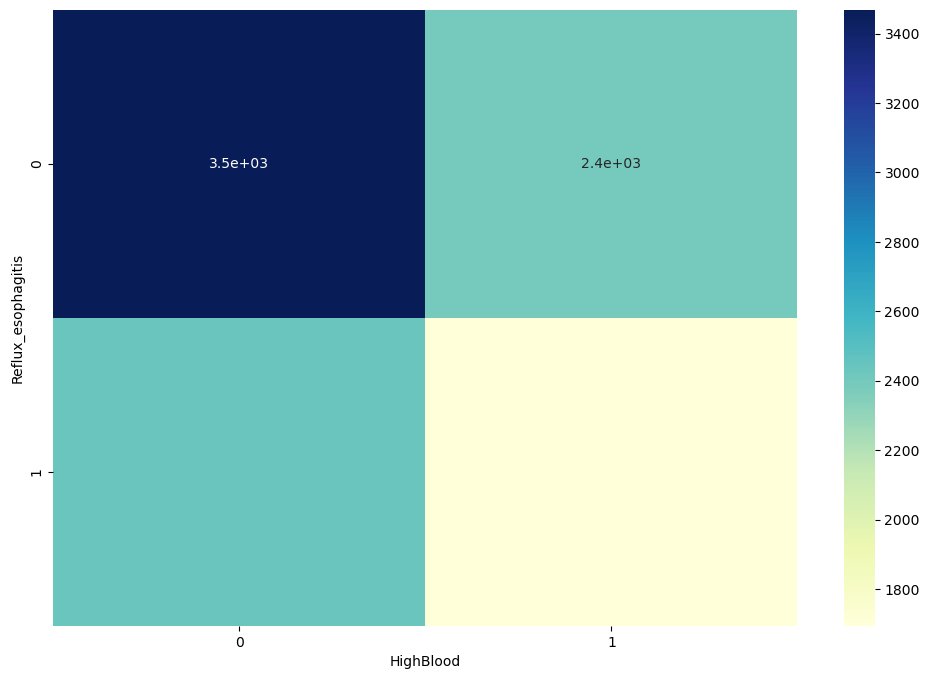

In [401]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [402]:
# HighBlood and Hyperlipidemia
contingency= pd.crosstab(med_data['Hyperlipidemia'], med_data['HighBlood'])
contingency

HighBlood,0,1
Hyperlipidemia,,
0,3895,2733
1,2015,1357


<Axes: xlabel='HighBlood', ylabel='Hyperlipidemia'>

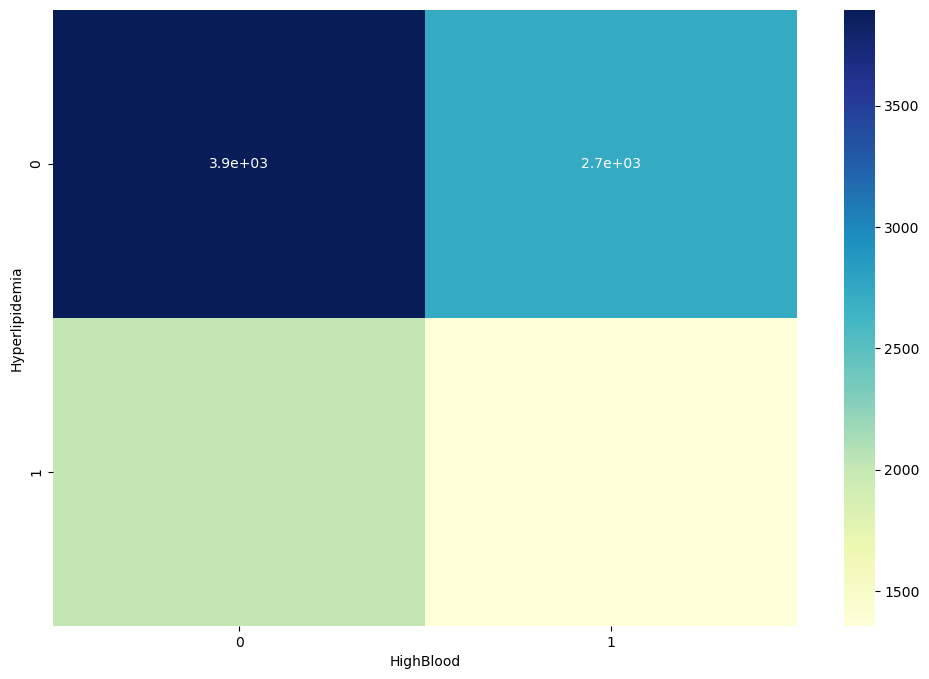

In [403]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [404]:
# HighBlood and Back Pain
contingency= pd.crosstab(med_data['BackPain'], med_data['HighBlood'])
contingency

HighBlood,0,1
BackPain,,
0,3486,2400
1,2424,1690


<Axes: xlabel='HighBlood', ylabel='BackPain'>

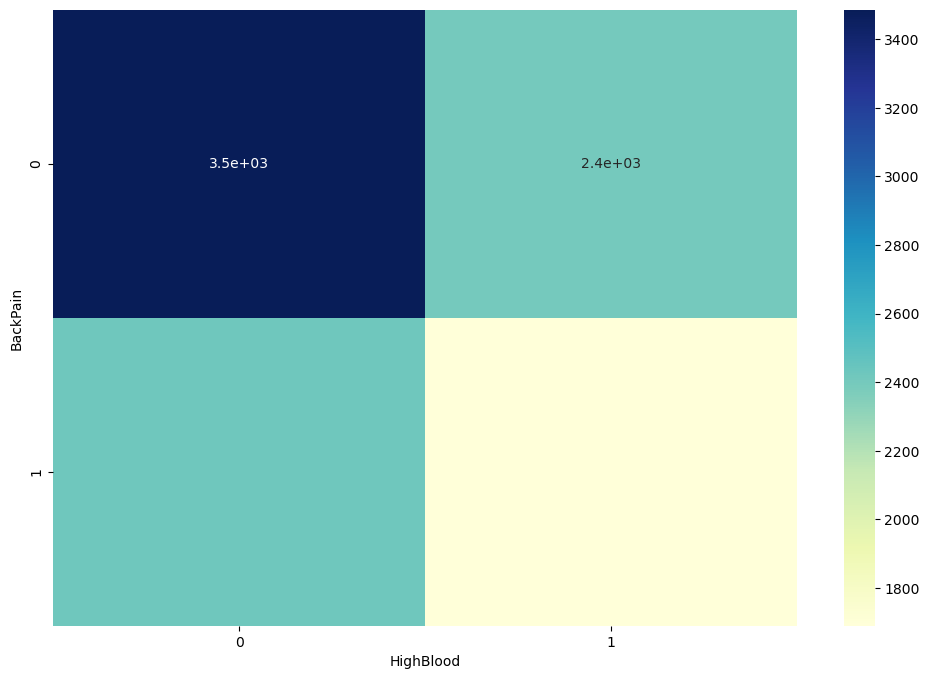

In [405]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [406]:
# HighBlood and Arthritis
contingency= pd.crosstab(med_data['Arthritis'], med_data['HighBlood'])
contingency

HighBlood,0,1
Arthritis,,
0,3815,2611
1,2095,1479


<Axes: xlabel='HighBlood', ylabel='Arthritis'>

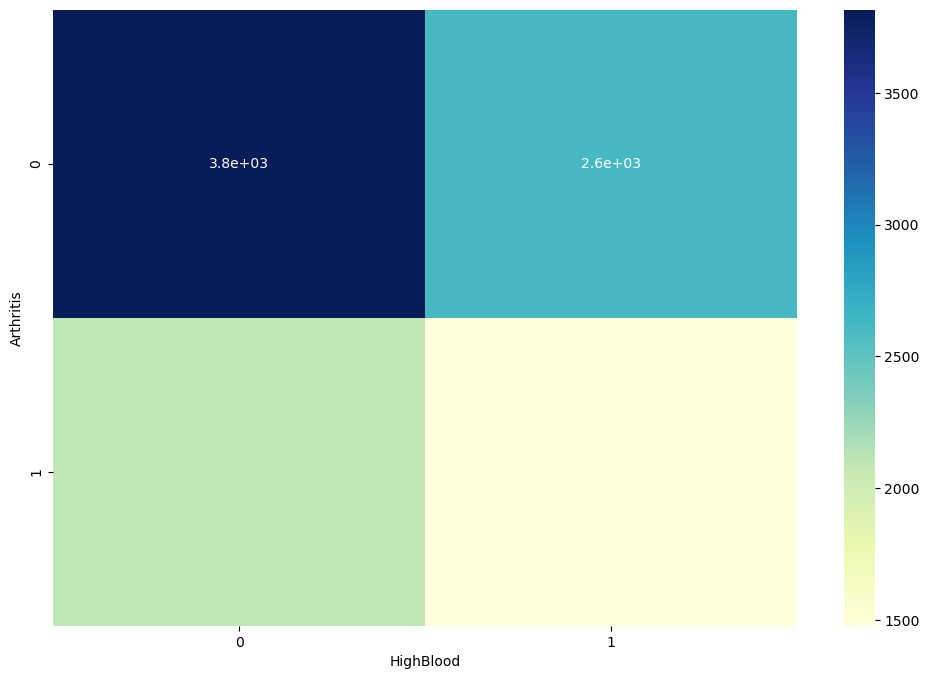

In [407]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [408]:
# HighBlood and Diabetes
contingency= pd.crosstab(med_data['Diabetes'], med_data['HighBlood'])
contingency

HighBlood,0,1
Diabetes,,
0,4279,2983
1,1631,1107


<Axes: xlabel='HighBlood', ylabel='Diabetes'>

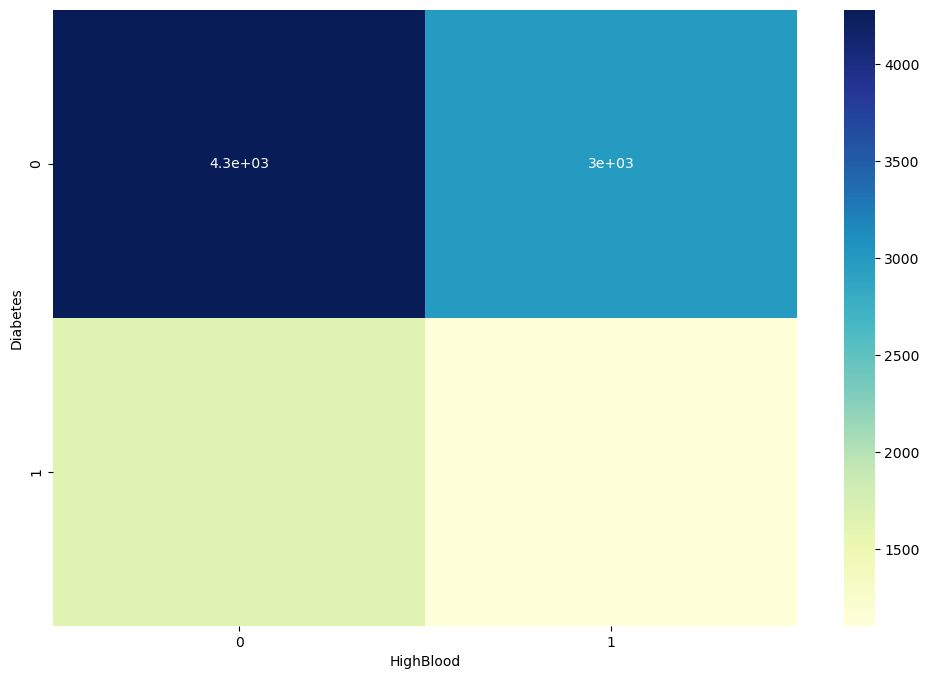

In [409]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [410]:
# HighBlood and Stroke
contingency= pd.crosstab(med_data['Stroke'], med_data['HighBlood'])
contingency

HighBlood,0,1
Stroke,,
0,4747,3260
1,1163,830


<Axes: xlabel='HighBlood', ylabel='Stroke'>

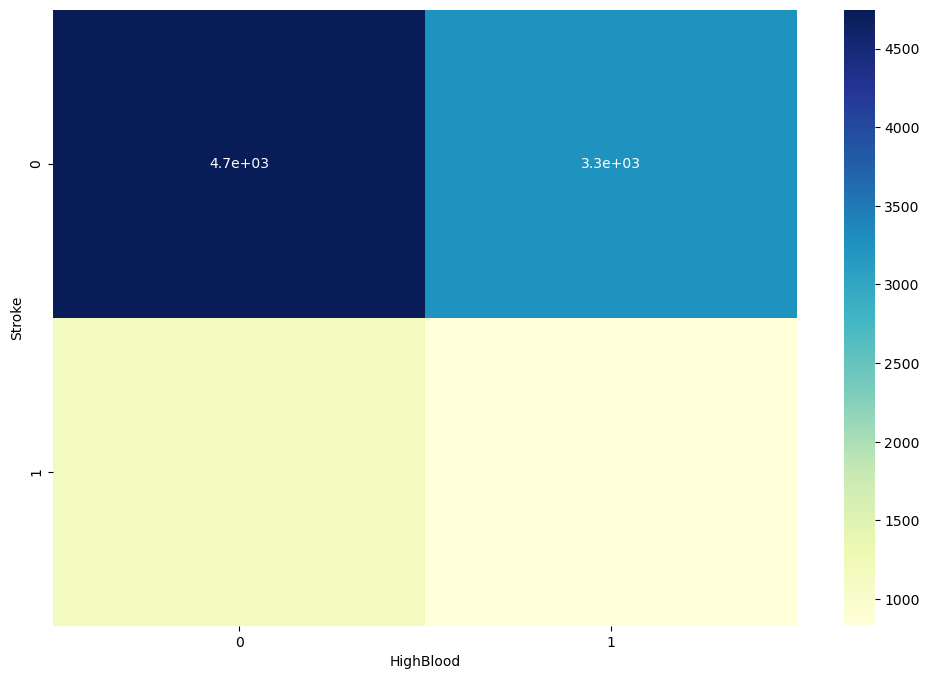

In [411]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [412]:
logit_df = med_data[['Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']]

logit_df.to_csv('mlr_med_data_final_logit.csv', index=False)

D208 Course Textbook: Practical Statistics for Data Scientists

In [413]:
y = logit_df.HighBlood
x = logit_df[['Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675793
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                0.001035
Time:                        12:41:35   Log-Likelihood:                -6757.9
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.3741
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0007      0.001      0.690      0.490      -0.001       0.003
Doc_v

I will reduce the model with the Backward Stepwise elimination method until we are left with only the statistically significant variables. I will begin by removing the variables one by one by selecting the highest p-value variable for removal. In this case, the highest p-value is the Stroke variable. We will use the significance level of 5% (or equal to or less than 0.050 p-values) for the purposes of this model.

I also tested for multicollinearity by using the variance inflation factor (VIF). Variables that have VIFs > 10 have multicollinearity going on and will be removed. 

In [414]:
X = logit_df[['Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

               feature        VIF
0                  Age   7.335580
1           Doc_visits  19.477435
2          VitD_levels  26.278495
3            vitD_supp   1.398923
4     Full_meals_eaten   1.979195
5           Overweight   3.379976
6              Anxiety   1.470169
7   Reflux_esophagitis   1.691335
8             BackPain   1.692191
9       Hyperlipidemia   1.499681
10              Stroke   1.248075
11           Arthritis   1.551574
12            Diabetes   1.372106


In [415]:
# Need to remove VitD_levels since VIF is above 10 and is the highest. Check VIFs again.
# No other VIFs above 10.
X = logit_df[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

               feature       VIF
0                  Age  6.419663
1           Doc_visits  9.591103
2            vitD_supp  1.390233
3     Full_meals_eaten  1.936490
4           Overweight  3.223842
5              Anxiety  1.456079
6   Reflux_esophagitis  1.668760
7             BackPain  1.677338
8       Hyperlipidemia  1.482532
9               Stroke  1.241761
10           Arthritis  1.537130
11            Diabetes  1.367328


In [416]:
#re-run OLS with the independent variables that we removed due to VIF. I will now use backward stepwise elimination to 15% significance or p-values below 0.15.
y = logit_df.HighBlood
x = logit_df[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675803
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                0.001019
Time:                        12:43:37   Log-Likelihood:                -6758.0
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.3148
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0007      0.001      0.695      0.487      -0.001       0.003
Doc_v

In [417]:
# Remove Reflux_esophagitis first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675805
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                0.001017
Time:                        12:43:43   Log-Likelihood:                -6758.0
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.2467
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0007      0.001      0.692      0.489      -0.001       0.003
Doc_visits 

In [418]:
# Remove BackPain first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten','Overweight', 'Anxiety', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675808
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                0.001011
Time:                        12:43:48   Log-Likelihood:                -6758.1
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.1880
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0007      0.001      0.698      0.485      -0.001       0.003
Doc_visits 

In [419]:
# Remove vitD_supp first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Age', 'Doc_visits', 'Full_meals_eaten','Overweight', 'Anxiety', 'Hyperlipidemia', 'Stroke', 'Arthritis', 'Diabetes']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675825
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0009870
Time:                        12:43:54   Log-Likelihood:                -6758.2
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.1473
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0007      0.001      0.704      0.481      -0.001       0.003
Doc_visits 

In [420]:
# Remove Diabetes first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Age', 'Doc_visits', 'Full_meals_eaten','Overweight', 'Anxiety', 'Hyperlipidemia', 'Stroke', 'Arthritis']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675842
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0009611
Time:                        12:44:03   Log-Likelihood:                -6758.4
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.1117
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0007      0.001      0.702      0.483      -0.001       0.003
Doc_visits 

In [421]:
# Remove Arthritis first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Age', 'Doc_visits', 'Full_meals_eaten','Overweight', 'Anxiety', 'Hyperlipidemia', 'Stroke']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675867
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0009252
Time:                        12:44:08   Log-Likelihood:                -6758.7
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.08478
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0007      0.001      0.707      0.480      -0.001       0.003
Doc_visits 

In [422]:
# Remove Age first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Doc_visits', 'Full_meals_eaten','Overweight', 'Anxiety', 'Hyperlipidemia', 'Stroke']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675892
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008882
Time:                        12:44:14   Log-Likelihood:                -6758.9
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.06158
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Doc_visits           0.0165      0.019      0.849      0.396      -0.022       0.055
Full_meals_

In [423]:
# Remove Stroke first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Doc_visits', 'Full_meals_eaten','Overweight', 'Anxiety', 'Hyperlipidemia']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675920
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0008460
Time:                        12:44:18   Log-Likelihood:                -6759.2
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.04321
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Doc_visits           0.0165      0.019      0.847      0.397      -0.022       0.055
Full_meals_

In [424]:
# Remove Anxiety first since it has the highest P-value
y = logit_df.HighBlood
x = logit_df[['Doc_visits', 'Full_meals_eaten','Overweight', 'Hyperlipidemia']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675955
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0007943
Time:                        12:44:22   Log-Likelihood:                -6759.6
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.02956
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Doc_visits           0.0165      0.019      0.845      0.398      -0.022       0.055
Full_meals_

In [425]:
# Remove Doc_visits first since it has the highest P-value.
y = logit_df.HighBlood
x = logit_df[['Full_meals_eaten','Overweight', 'Hyperlipidemia']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.675991
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0007415
Time:                        12:44:26   Log-Likelihood:                -6759.9
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.01829
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Full_meals_eaten     0.0302      0.020      1.501      0.133      -0.009       0.070
Overweight 

In [426]:
# Remove Hyperlipidemia first since it has the highest P-value.
y = logit_df.HighBlood
x = logit_df[['Full_meals_eaten','Overweight']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.676035
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0006764
Time:                        12:44:30   Log-Likelihood:                -6760.3
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.01030
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Full_meals_eaten     0.0302      0.020      1.501      0.133      -0.009       0.070
Overweight 

In [427]:
# Remove Full_meals_eaten first since it has the highest P-value. This is the final reduced model.
y = logit_df.HighBlood
x = logit_df[['Overweight']].assign(const=1)

model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.676147
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:               0.0005102
Time:                        12:45:33   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.008607
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Overweight     0.1181      0.045      2.622      0.009       0.030       0.206
const         -0.4521      0.

Here, we can see that comparing the initial MLR model and a reduced model is helpful because all of the remaining variables in the reduced model are statistically significant at 5% or less.

The reduced logistic model regression equation is the following: HighBlood = -0.4521 + .1181 (Overweight)

Interpretation of Coefficients:

To compare the initial model with the reduced model, we can see that the reduced model is better than the initial model by way of the LLR p-values. The initial model had a LLR p-value of 0.3148 and the reduced model has a LLR p-value of 0.0086, which is much lower. This shows that the reduced model is better and more effective than the initial model.

In [428]:
results.params

Overweight    0.118090
const        -0.452146
dtype: float64

In [429]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression classifier on test set: 0.60
[[1814    0]
 [1186    0]]


In [430]:
# Odds ratios for coefficients
print(f"The odds ratio for overweight is {round(np.exp(0.1181), 2)}. Given this, the change in odds for high blood pressure is {round((np.exp(0.118678) - 1) * 100, 2)}")

The odds ratio for overweight is 1.13. Given this, the change in odds for high blood pressure is 12.6


Interpretation of Coefficients:

Keeping all other things constant, for one unit increase in Overweight, the change log odds of HighBlood by .1181.
Given what we know about this logistic regression model, we can determine that it is indeed statistically significant because the LLR p-value of 0.0086 is below 0.05.

Given the outcome of this regression analysis, I believe there is good practical evidence that the patients' incidence of them being overweight contributes to the presence of high blood pressure.

However, it is also important to discuss the limitations of the analysis at hand. The first limitation of this analysis is the availability of variables to test. For example, perhaps if we had more applicable variables, our outcome could be better. Second, there are only 10,000 records in this dataset. And, finally, the data only covers a certain amount of time - if there was more data over a greater period of time, we might have more information and a better outcome.

It is my recommended course of action that the results of this regression be utilized to address overweight status in patients so that we may better understand the effects on high blood pressure. Further research and even preventive action into these variables is warranted given the results of the regression.